# Лабораторная работа 2. Описательная статистика.
## Титульная информация

Бровкин Аким Алексеевич, ИСУ 465282, группа J3110
Воробьёв Андрей Павлович, ИСУ 465440, группа J3111
Шакина Анна Сергеевна, ИСУ 396675, группа J3111

In [1]:
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Выберите два распределения (одно дискретное, другое непрерывное). Сгенерируйте, используя библиотеки, выборку из N = 1000 значений для каждого из распределений.

Распределение Пуассона задаётся по формуле
$$
f(x) = \frac{\lambda^x e^{-\lambda}}{x!}
$$
где $\lambda$ - среднее значение, $x$ - количество событий.

Нормальное распределение задаётся по формуле
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
где $\mu$ - математическое ожидание, $\sigma$ - стандартное отклонение.

In [19]:
np.random.seed(2006)
n = 1000

# Генерация дискретного распределения (Пуассон)
lambda_poisson = 2.3
poisson_data = np.random.poisson(lambda_poisson, size=n)

# Генерация непрерывного распределения (нормальное)
mu = 0
sigma = 1
normal_data = np.random.normal(mu, sigma, size=n)

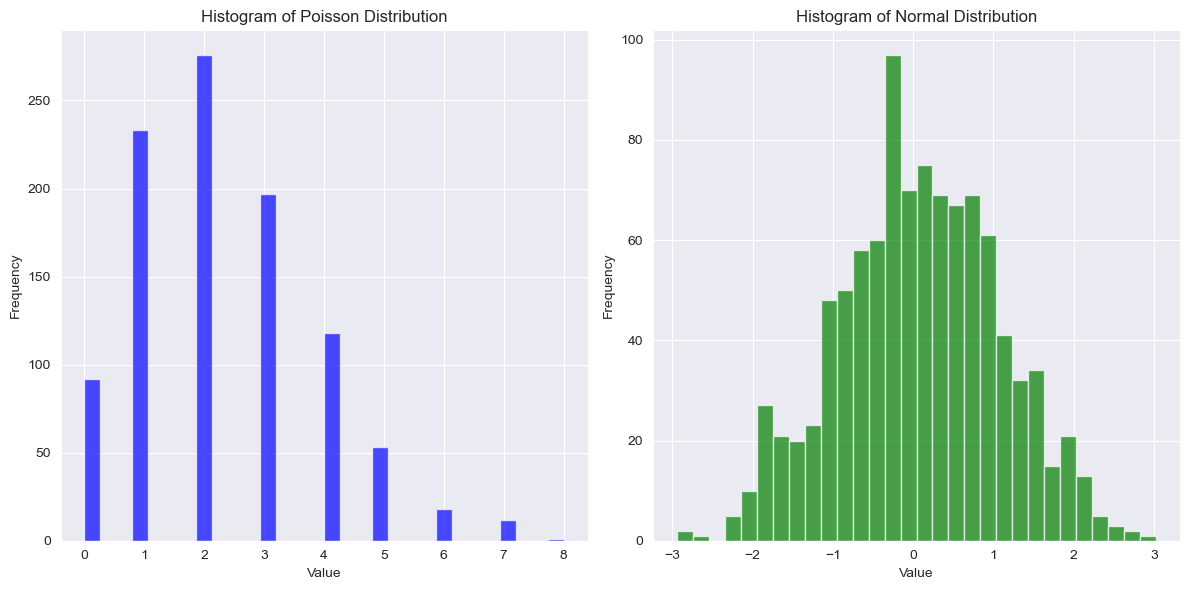

In [20]:
# Визуализация данных
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(poisson_data, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(normal_data, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

По гистограммам видно, что распределение Пуассона имеет ассиметричную форму, а нормальное более симметрично. Но заметен большой выброс в районе нуля, который портит симметрию это связано с малым размером выборки. При увеличении выборки распределение будет более симметричным.

## Для каждой выборки:

## Рассчитайте основные описательные статистики:
* Квартили: Q1, Q2, Q3.
* Меры центральной тенденции: выборочное среднее, медиана, мода.
* Меры вариабельности: размах выборки, интерквартильный размах, дисперсия, стандартное отклонение, коэффициент вариации, среднее абсолютное отклонение.
* Меры формы распределения: коэффициенты асимметрии, эксцесса.
* Первые 5 начальных и центральных моментов (допускается использование смещенных характеристик).


In [4]:
# Функция для расчета основных описательных статистик
def get_stats(data):
    # Квартили
    Q1 = np.percentile(data, 25)  # 25-й процентиль
    Q2 = np.percentile(data, 50)  # 50-й процентиль (медиана)
    Q3 = np.percentile(data, 75)  # 75-й процентиль
    # Меры центральной тенденции
    mean = np.mean(data)  # выборочное среднее
    median = np.median(data)  # медиана
    mode = stats.mode(data, keepdims=True).mode[0]  # мода
    # Меры вариабельности
    range = np.max(data) - np.min(data)  # размах выборки
    iqr = Q3 - Q1  # интерквартильный размах
    variance = np.var(data)  # дисперсия (смещенная)
    std_dev = np.std(data)  # стандартное отклонение (смещенное)
    cv = std_dev / mean  # коэффициент вариации
    mad = np.mean(np.abs(data - mean))  # среднее абсолютное отклонение
    # Меры формы распределения
    skewness = stats.skew(data)  # коэффициент асимметрии
    kurtosis = stats.kurtosis(data)  # коэффициент эксцесса
    # Первые 5 начальных и центральных моментов
    moments = [np.mean(data), np.var(data), stats.skew(data),
               stats.kurtosis(data),
               np.mean(np.abs(data - mean))]  # первые 5 моментов

    # Создание DataFrame для удобного отображения
    result = pd.DataFrame({
        'Характеристика': ['Q1', 'Q2', 'Q3', 'Выборочное среднее', 'Медиана', 'Мода', 'Размах выборки',
                           'Интерквартильный размах', 'Дисперсия', 'Стандартное отклонение', 'Коэффициент вариации',
                           'Cреднее абсолютное отклонение', 'Коэффициент асимметрии', 'Коэффициент эксцесса',
                           'Первый момент', 'Второй момент', 'Третий момент', 'Четвертый момент', 'Пятый момент'],
        'Значение': [Q1, Q2, Q3, mean, median, mode, range,
                     iqr, variance, std_dev, cv, mad, skewness,
                     kurtosis, moments[0], moments[1], moments[2], moments[3],
                     moments[4]]
    })
    result.set_index('Характеристика', inplace=True)
    return result


# Дискретное распределение (Пуассон)

Основные описательные статистики

In [5]:
poisson_stats = get_stats(poisson_data)
poisson_stats

,Значение
Характеристика,
Q1,1.000000
Q2,2.000000
Q3,3.000000
Выборочное среднее,2.313000
Медиана,2.000000
Мода,2.000000
Размах выборки,8.000000
Интерквартильный размах,2.000000
Дисперсия,2.273031


Данные полностью подтверждают визуализацию. Из данных можно сделать вывод, что большая часть значений распределена в интервале от 1 до 3, что подтверждается квартилями, средним, модианой, модой, стандартным отклонением, средним абсолютным отклонением. Коэффициент вариации почти равен нулю, что говорит о большой схожести данных в сравнении с размерами среднего. Так же можно заметить, что распределение имеет положительную ассиметрию - большая часть значений меньше среднего, а хвост тянется вправо. Экцесс положительный, что говорит о том, что распределение имеет более толстые хвосты, чем нормальное распределение.

Эмпирическая функция распределения задаётся по формуле
$$
F(x) = P(X \leq x) = \frac{1}{N} \sum_{i=1}^{N} I(X_i \leq x)
$$
где $I(X_i \leq x)$ - индикаторная функция, которая равна 1, если $X_i \leq x$, и 0 в противном случае.

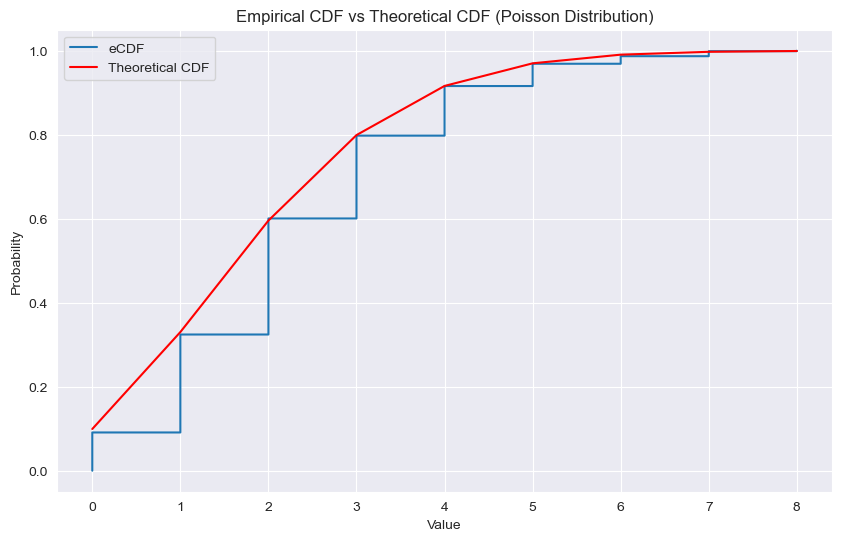

In [6]:
plt.figure(figsize=(10, 6))

# Эмпирическая функция распределения eCDF
x_poisson = np.sort(poisson_data)
ecdf_poisson = np.arange(1, n + 1) / n
plt.step(x_poisson, ecdf_poisson, label='eCDF', where='post')

# Теоретическая функция распределения CDF
x = np.arange(0, np.max(poisson_data) + 1)
theoretical_cdf_poisson = stats.poisson.cdf(x, lambda_poisson)
plt.plot(x, theoretical_cdf_poisson, label='Theoretical CDF', color='red')

plt.title('Empirical CDF vs Theoretical CDF (Poisson Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

По результатам графика видно, что эмпирическая функция распределения совпадает с теоретической. Это говорит о том, что выборка была правильно сгенерирована и соответствует теоретическому распределению.

Эмпирическая функция вероятности задаётся по формуле
$$
P(X = x) = \frac{n_x}{N}
$$
где $n_x$ - количество наблюдений, равных $x$, $N$ - общее количество наблюдений.

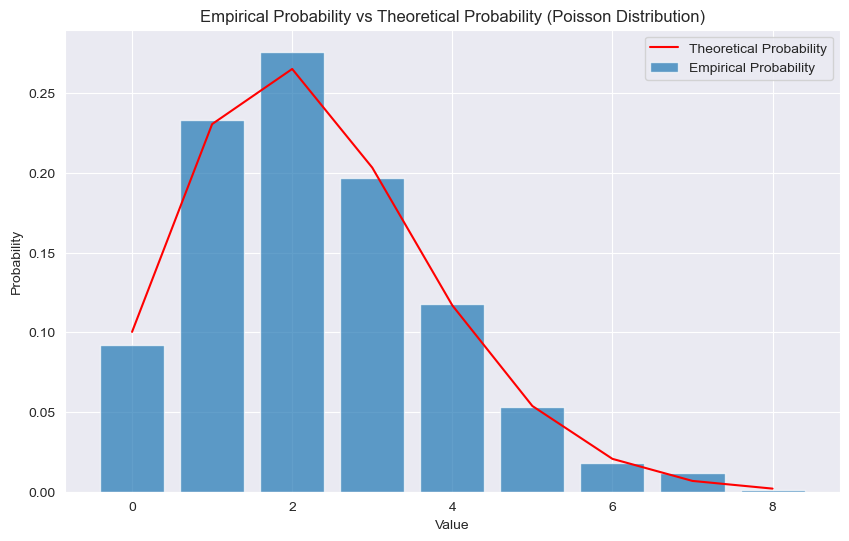

In [7]:
plt.figure(figsize=(10, 6))

# Эмпирическая функция вероятности
x_poisson_prob = np.arange(0, np.max(poisson_data) + 1)
empirical_prob_poisson = np.array([(poisson_data == x).sum() for x in x_poisson_prob]) / n
plt.bar(x_poisson_prob, empirical_prob_poisson, label='Empirical Probability', alpha=0.7)

# Теоретическая функция вероятности
theoretical_prob_poisson = stats.poisson.pmf(x_poisson_prob, lambda_poisson)
plt.plot(x_poisson_prob, theoretical_prob_poisson, label='Theoretical Probability', color='red')

plt.title('Empirical Probability vs Theoretical Probability (Poisson Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

В данном случае различие между эмпирической и теоретической функцией вероятности незначительное. Это говорит о том, что выборка была правильно сгенерирована и соответствует теоретическому распределению.

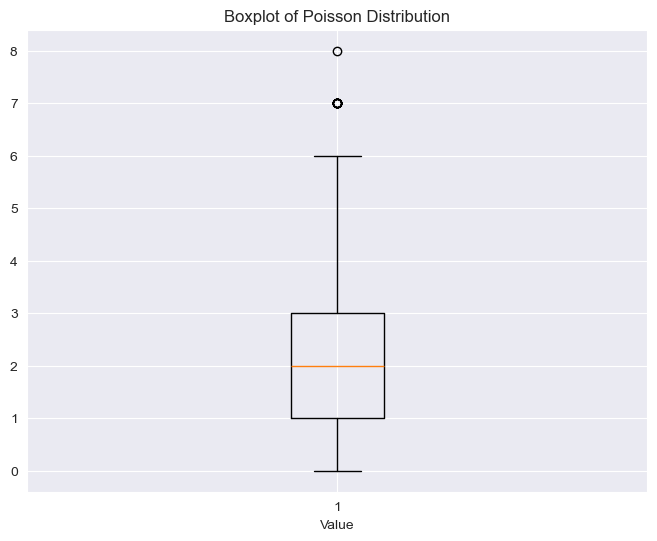

In [8]:
# Построение boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(poisson_data)
plt.title('Boxplot of Poisson Distribution')
plt.xlabel('Value')
plt.show()

График подтверждает все полученные характеристики распределения. И так же выделяет как выбросы значения равные 7 и 8.

# Непрерывное распределение (нормальное)

Основные описательные статистики

In [9]:
normal_stats = get_stats(normal_data)
normal_stats

,Значение
Характеристика,
Q1,-0.598686
Q2,0.065611
Q3,0.762766
Выборочное среднее,0.074946
Медиана,0.065611
Мода,-2.943279
Размах выборки,5.971510
Интерквартильный размах,1.361452
Дисперсия,1.004355


Так как дано нормальное распределение, то данные должны быть почти идеальны и симметричны. Но из-за достаточно малой выборки можно заметить, что распределение имеет сдвиг вправо. Это подтверждается значениями квартилей, среднего, медианы. В основном, же результаты похожи на нормальное распределение, сдвиги от 0 очень маленькие, дисперсия и стандартное отклонение равны 1. Но погрешности всё же наблюдаются. Моды является нерепрезентативным показателем, так как в выборке нет повторяющихся значений. Коэффициент вариации также не является репрезентативным показателем, так как выборка имеет среднее равное 0.

Эмпирическая функция распределения задаётся по формуле
$$
F(x) = P(X \leq x) = \frac{1}{N} \sum_{i=1}^{N} I(X_i \leq x)
$$
где $I(X_i \leq x)$ - индикаторная функция, которая равна 1, если $X_i \leq x$, и 0 в противном случае.

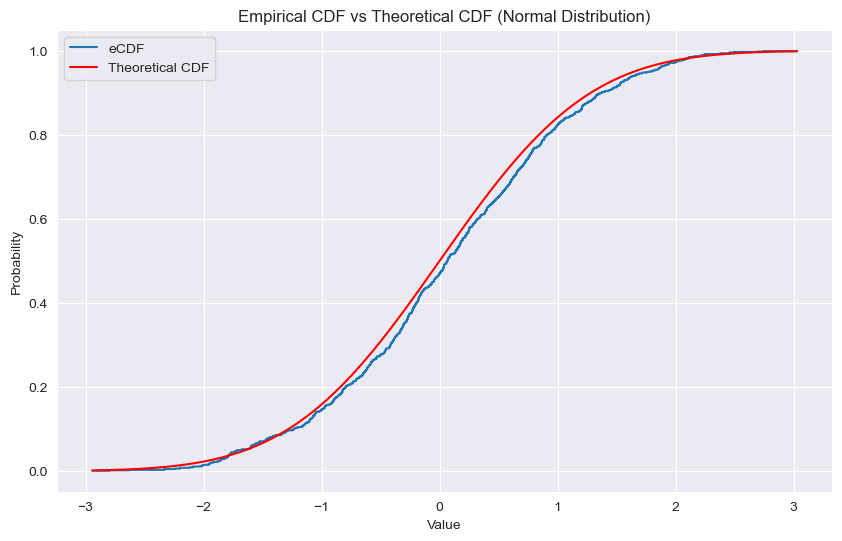

In [10]:
plt.figure(figsize=(10, 6))

# Эмпирическая функция распределения eCDF
x_normal = np.sort(normal_data)
ecdf_normal = np.arange(1, n + 1) / n
plt.step(x_normal, ecdf_normal, label='eCDF', where='post')

# Теоретическая функция распределения CDF
x = np.linspace(np.min(normal_data), np.max(normal_data), 1000)
theoretical_cdf_normal = stats.norm.cdf(x, mu, sigma)
plt.plot(x, theoretical_cdf_normal, label='Theoretical CDF', color='red')

plt.title('Empirical CDF vs Theoretical CDF (Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

По графику видно почти полное совпадение эмпирической функции распределения с теоретической.

Эмпирическая плотность распределения задаётся по формуле
$$
h_j = \frac{ \#\{X_i \in B_j\} }{n \cdot |B_j|}
$$
где $B_j$ - j-й интервал, $|B_j|$ - длина интервала, $\#\{X_i \in B_j\}$ - количество наблюдений в интервале.

Формула Скотта для выбора количества бинов
$$
h = \frac{3.5 \cdot \sigma}{n^{1/3}}
$$
где $h$ - ширина бина, $\sigma$ - стандартное отклонение, $n$ - количество наблюдений.

C:\Users\VORANDPAV BIG SPB\AppData\Local\Temp\ipykernel_6660\3387115218.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  3.5 * normal_stats.loc["Стандартное отклонение"][0] / (n ** (1 / 3)))))


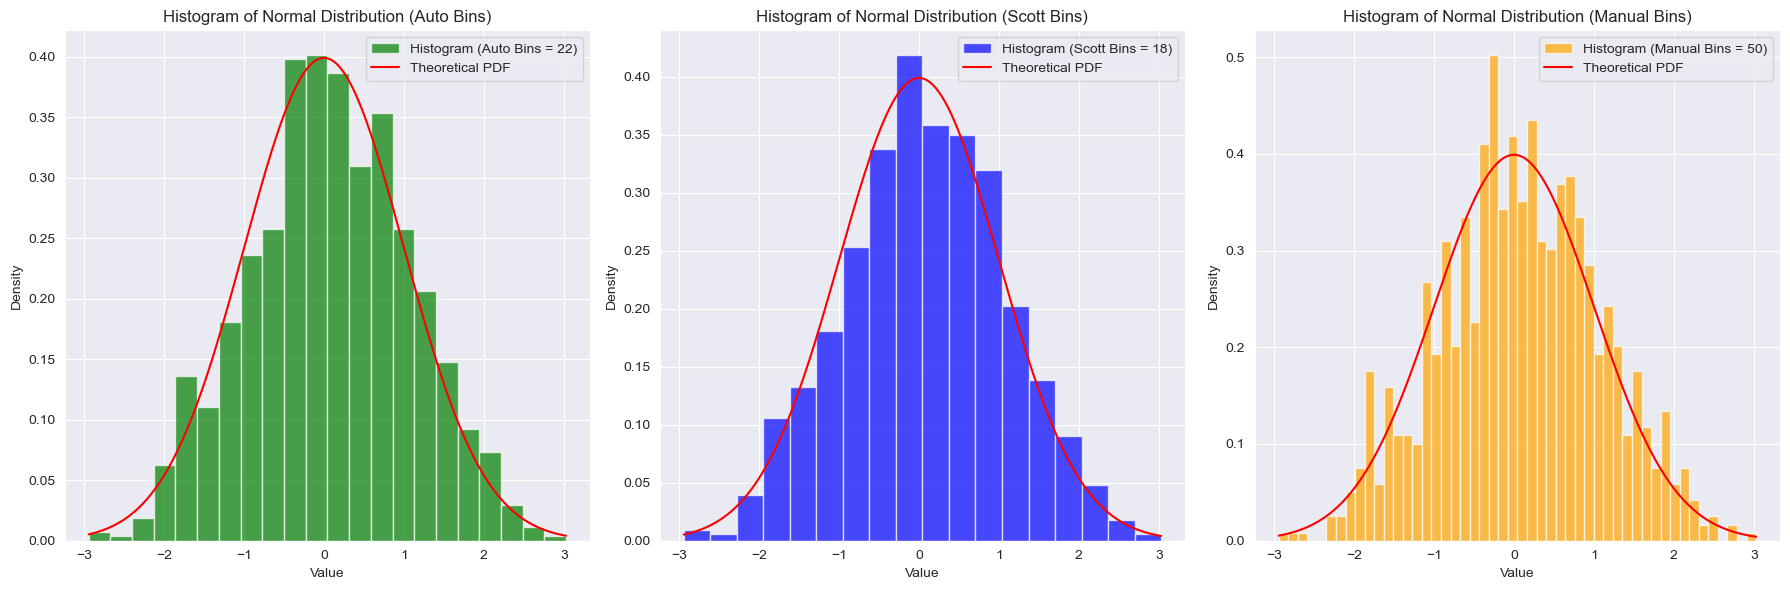

In [26]:
plt.figure(figsize=(18, 6))


def plot_teoretical_pdf():
    x = np.linspace(np.min(normal_data), np.max(normal_data), 1000)
    theoretical_pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, theoretical_pdf, label='Theoretical PDF', color='red')


# Автоматический выбор количества бинов
plt.subplot(1, 3, 1)
bin_edges_auto = np.histogram_bin_edges(normal_data, bins='auto')  # Получение границ бинов
num_bins_auto = len(bin_edges_auto) - 1  # Количество бинов
plt.hist(normal_data, bins='auto', density=True, alpha=0.7, color='green',
         label=f'Histogram (Auto Bins = {num_bins_auto})')
plot_teoretical_pdf()
plt.title('Histogram of Normal Distribution (Auto Bins)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Выбор количества бинов по формуле Скотта
plt.subplot(1, 3, 2)
num_bins_scott = int(np.ceil((np.max(normal_data) - np.min(normal_data)) / (
        3.5 * normal_stats.loc["Стандартное отклонение"][0] / (n ** (1 / 3)))))
plt.hist(normal_data, bins=num_bins_scott, density=True, alpha=0.7, color='blue',
         label=f'Histogram (Scott Bins = {num_bins_scott})')
plot_teoretical_pdf()
plt.title('Histogram of Normal Distribution (Scott Bins)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Ручной выбор количества бинов
plt.subplot(1, 3, 3)
num_bins_manual = 50
plt.hist(normal_data, bins=num_bins_manual, density=True, alpha=0.7, color='orange',
         label=f'Histogram (Manual Bins = {num_bins_manual})')
plot_teoretical_pdf()
plt.title('Histogram of Normal Distribution (Manual Bins)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

Количество интервалов, подобранных автоматически и по формуле Скотта, близко. Оно хорошо вписывает в теоретический график и сглаживает данные. Было решено выбрать количество интервалов равным 50, так как оно даёт более детальную картину распределения. По нему видны большинство аномалий, не теряя при этом качества картинки.

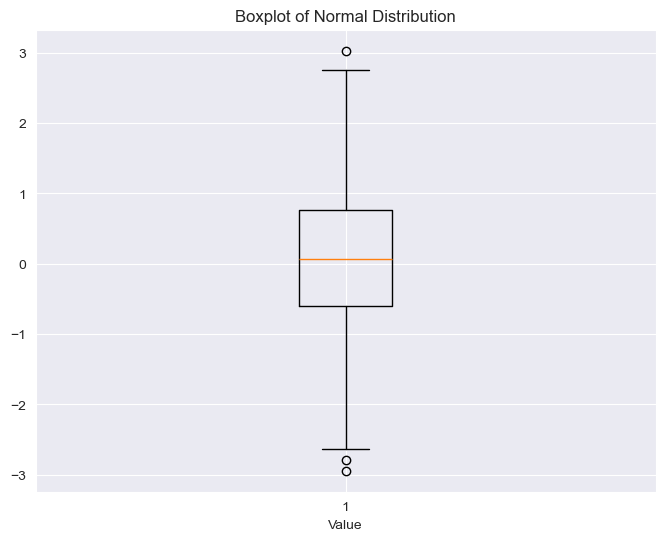

In [12]:
# Построение boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(normal_data)
plt.title('Boxplot of Normal Distribution')
plt.xlabel('Value')
plt.show()

График почти идеально симметричен относительно нуля, что соответствует нормальному распределению.

Исследование на устойчивость характеристик

Для создания максимальной случайности было решено выбирать пропорцию выбросов слева и справа от распределения, так же случайно выбирать границы выбросов. А в этих границах генерировать выбросы. Это позволит создать более реалистичную выборку, которая может быть получена в реальных условиях.


In [61]:
# Выбор величин для выбросов
proportion = np.random.random()  # Пропорция сколько выбросов будет левее
left_left = np.random.randint(-100, -5)  # Левая граница левого выброса
left_right = np.random.randint(left_left, -5)  # Правая граница левого выброса
right_left = np.random.randint(5, 100)  # Левая граница правого выброса
right_right = np.random.randint(right_left, 100)  # Правая граница правого выброса
print(f'Left outlier range: [{left_left}, {left_right}]')
print(f'Right outlier range: [{right_left}, {right_right}]')
print(f'Left proportion: {proportion * 100:.2f}%')

Left outlier range: [-10, -6]
Right outlier range: [20, 80]
Left proportion: 3.03%


В результате получилось, что выбросы будут в большей своей части на отрезке справа, и малый процент слева. Также выбросы слева сосредоточены на коротком интервале близко к 0, а справа - на длинном и далеко от 0.

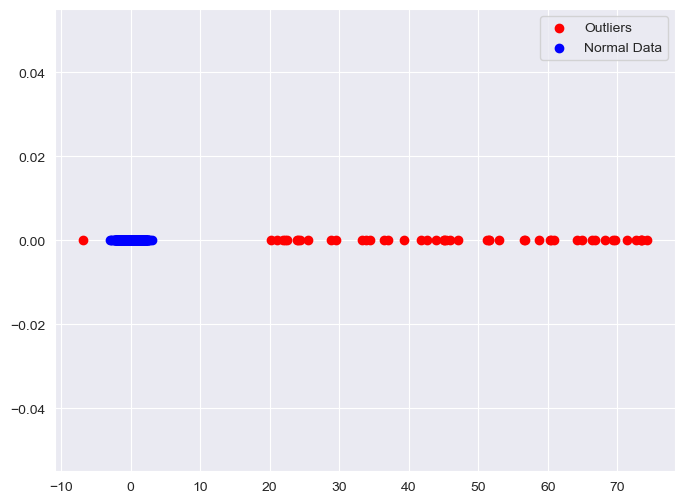

,Без выбросов,С выбросами
,Значение,Значение
Характеристика,,
Q1,-0.598686,-0.566829
Q2,0.065611,0.138918
Q3,0.762766,0.868457
Выборочное среднее,0.074946,2.261671
Медиана,0.065611,0.138918
Мода,-2.943279,-6.823681
Размах выборки,5.971510,81.067544
Интерквартильный размах,1.361452,1.435286


In [62]:
# Добавление выбросов
outliers = np.concat((
    np.random.uniform(low=left_left, high=left_right, size=int(n * proportion * 0.05)),
    np.random.uniform(low=right_left, high=right_right, size=int(n * (1 - proportion) * 0.05))
))
plt.figure(figsize=(8, 6))
plt.scatter(outliers, np.zeros_like(outliers), color='red',
            label=f'Outliers')
plt.scatter(normal_data, np.zeros_like(normal_data), color='blue', label='Normal Data')
plt.legend()
plt.show()
with_outliers_stats = get_stats(np.concat((normal_data, outliers)))
result = pd.concat(
    [normal_stats, with_outliers_stats],
    axis=1,
    keys=['Без выбросов', 'С выбросами']
)
result

Из-за малых размеров выбросов, они не сильно повлияли на характеристики. Но можно заметить сдвиг Q2 и Q3 в правую сторону, что говорит о увеличении значения правой части. Выборочное среднее уже более значительно сдвинулось, так как правые числа большие. Медиана сдвинулась не сильно, так как для неё главным является размер выброса. Мода опять остаётся нерепрезентативным показателем, так как в выборке нет повторяющихся значений. Размах выборки значительно вырос, а интерквартильный как раз проигнорировал выбросы. Дисперсия и стандартное отклонение увеличились в 100 и 10 раз соответственно, так как числа справа большие, а их квадраты вносят ещё больший вклад. Средне абсолютное отклонение, всё же больше проигнорировало выбросы. Коэффициент асимметрии стал отмечать выбросы, так как он стал больше 0. Коэффициент эксцесса стал значительно больше нуля, что означает, что распределение стало более плоским и с длинными хвостами.

In [63]:
# Анализ устойчивости характеристик
outliers_results = (normal_stats.copy())
for persent in range(10, 101, 10):
    outliers = np.random.uniform(low=left_left, high=left_right, size=int(n * proportion * persent / 100))
    outliers = np.concat((
        outliers,
        np.random.uniform(low=right_left, high=right_right, size=int(n * (1 - proportion) * persent / 100))
    ))
    outliers_results[f'Выбросы {persent}%'] = get_stats(np.concat((normal_data, outliers)))
outliers_results

,Значение,Выбросы 10%,Выбросы 20%,Выбросы 30%,Выбросы 40%,Выбросы 50%,Выбросы 60%,Выбросы 70%,Выбросы 80%,Выбросы 90%,Выбросы 100%
Характеристика,,,,,,,,,,,
Q1,-0.598686,-0.530505,-0.425649,-0.380943,-0.323754,-0.275139,-0.230030,-0.183653,-0.147833,-0.065099,0.000338
Q2,0.065611,0.181755,0.306022,0.457477,0.601432,0.727568,0.863714,1.017934,1.249097,1.532337,1.948134
Q3,0.762766,0.994586,1.327408,1.910118,26.573295,34.484728,38.697734,43.229295,45.272996,48.546317,48.376792
Выборочное среднее,0.074946,4.198515,7.989278,11.069196,13.893006,16.288331,18.043326,19.895957,21.586294,23.074521,24.027199
Медиана,0.065611,0.181755,0.306022,0.457477,0.601432,0.727568,0.863714,1.017934,1.249097,1.532337,1.948134
Мода,-2.943279,-9.465725,-9.666508,-9.838326,-9.729471,-9.980808,-9.910267,-9.802316,-9.923837,-9.746847,-9.890504
Размах выборки,5.971510,88.729314,89.374249,89.670198,89.679731,89.746099,89.864732,89.702304,89.704763,89.675754,89.857347
Интерквартильный размах,1.361452,1.525091,1.753056,2.291061,26.897049,34.759867,38.927764,43.412948,45.420829,48.611416,48.376454
Дисперсия,1.004355,207.534596,383.396577,499.324609,590.778604,654.089245,684.789525,718.640863,751.466924,768.731277,776.214767


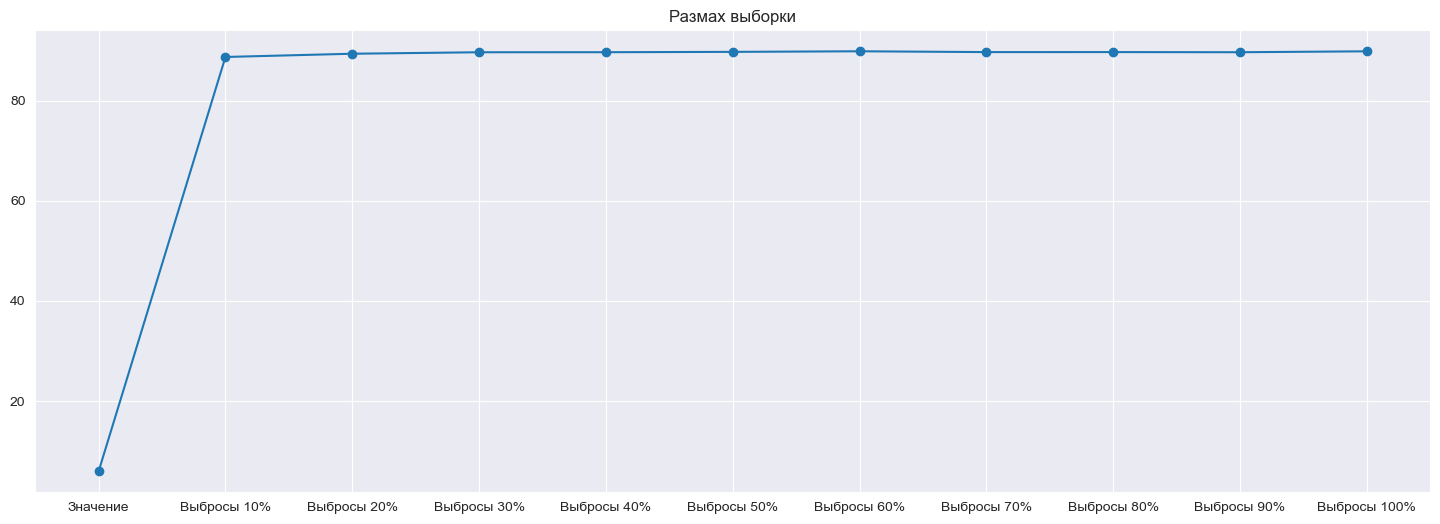

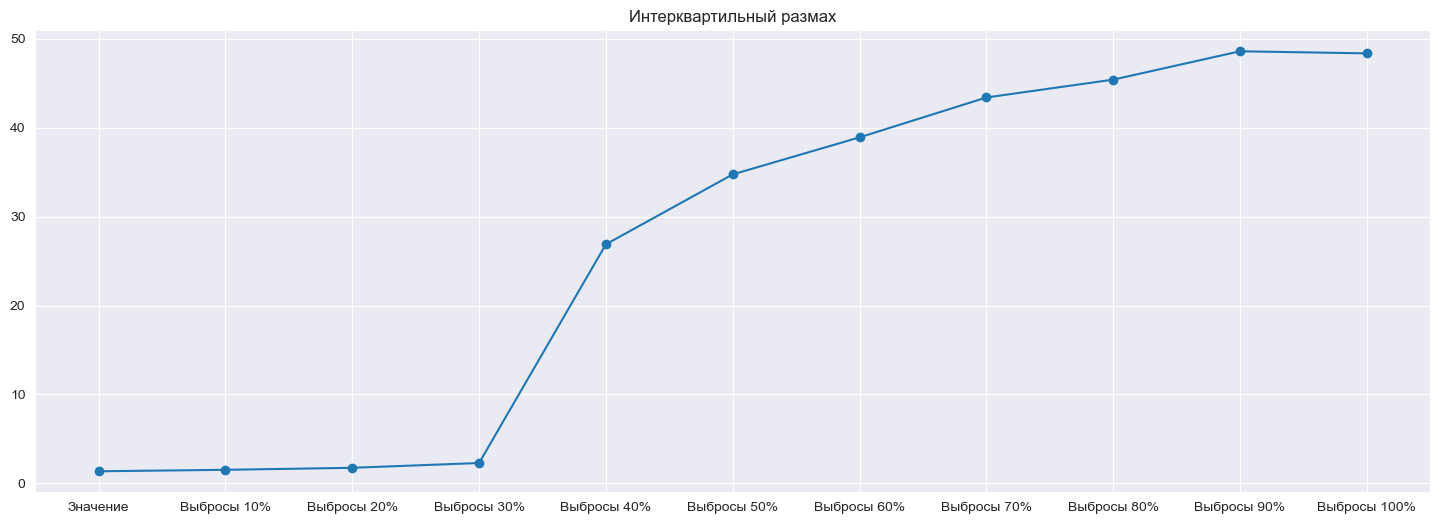

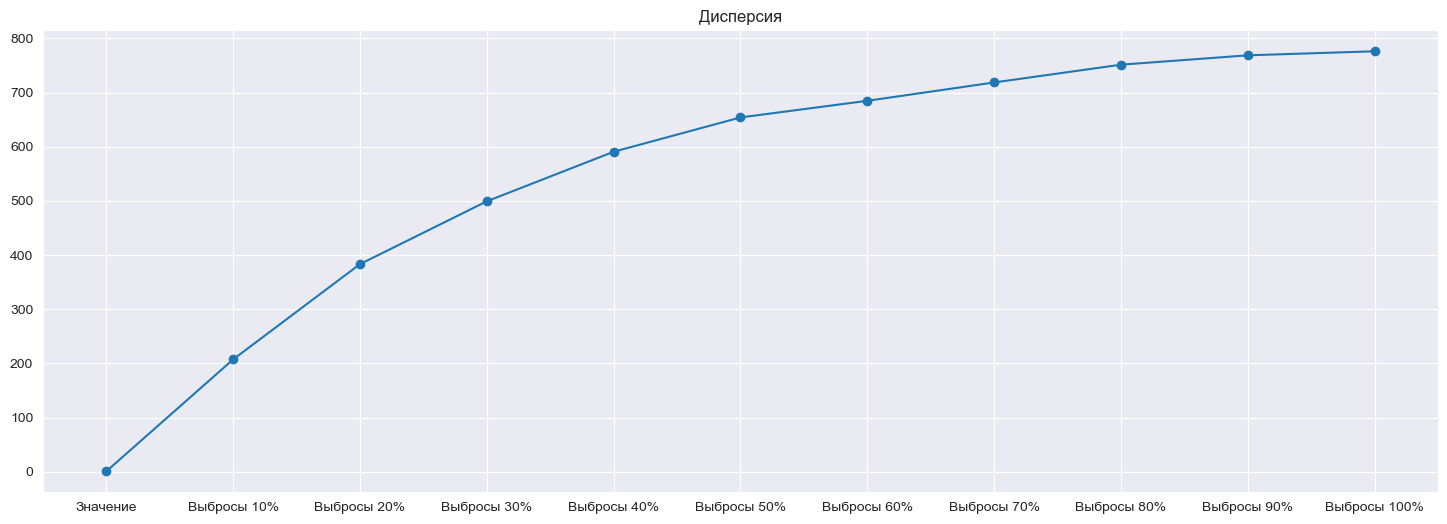

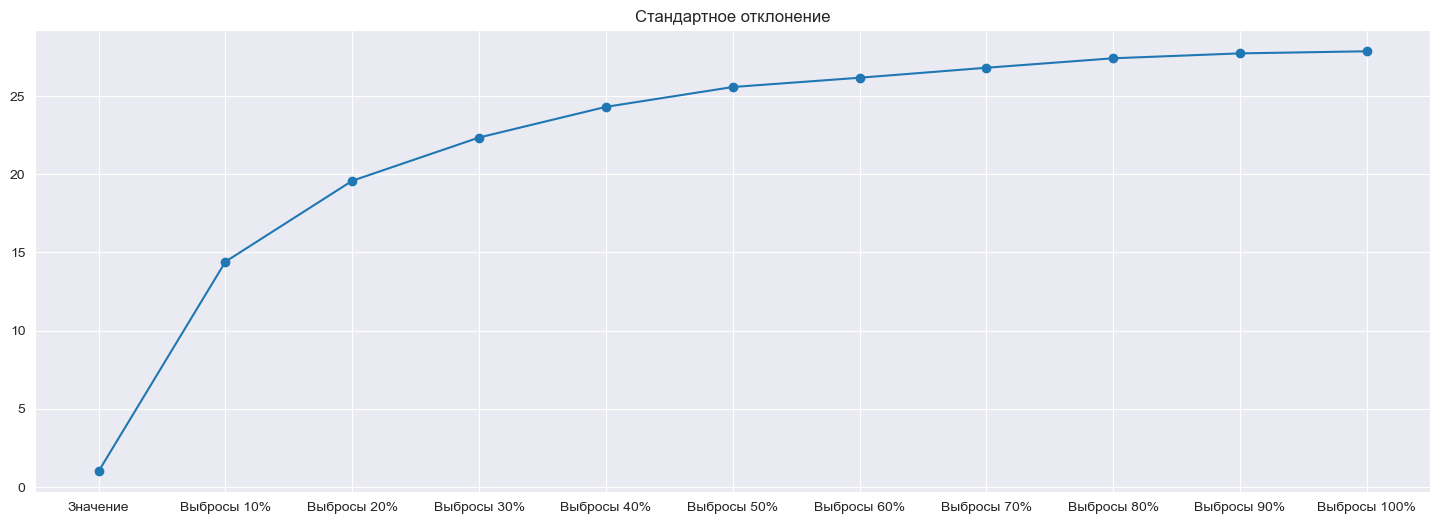

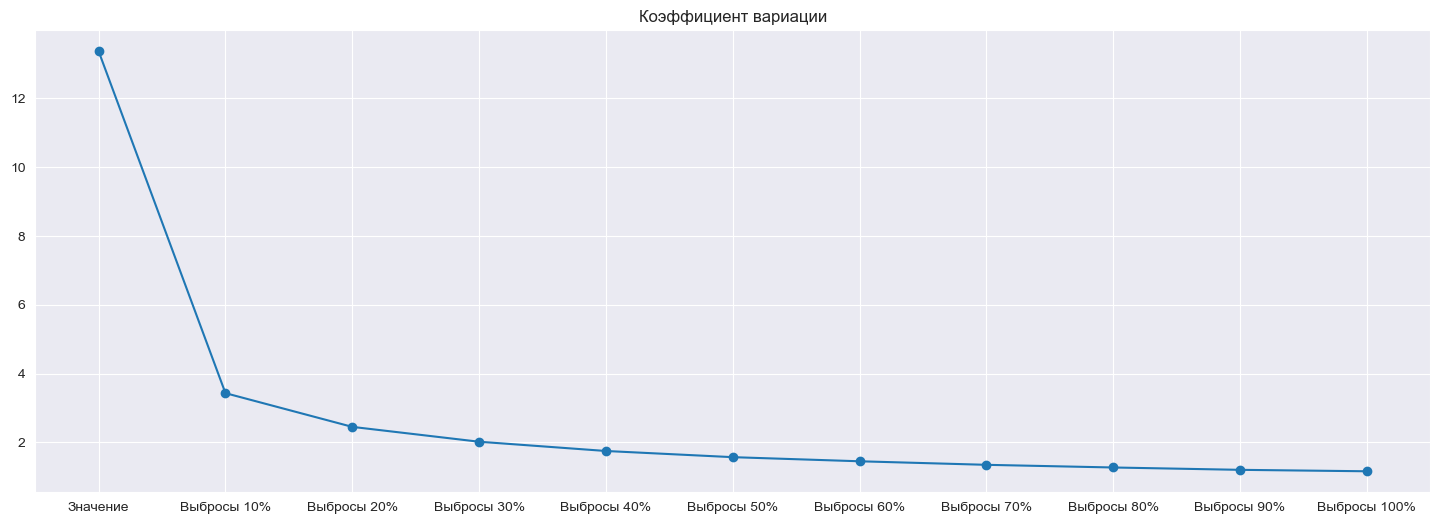

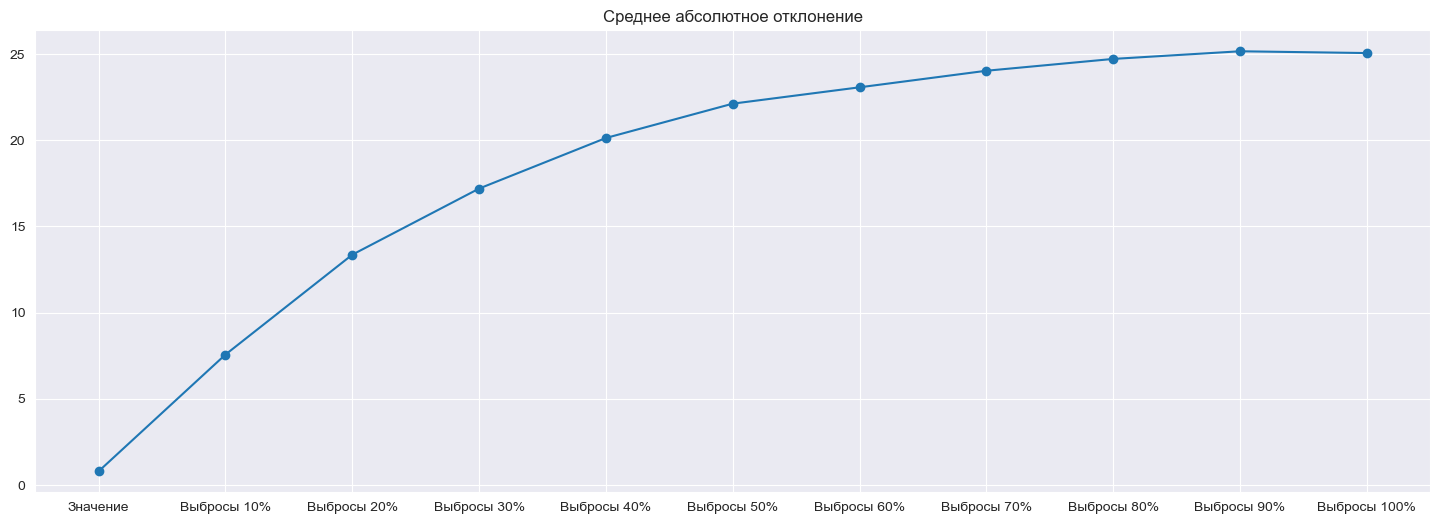

In [64]:
# График изменения мер вариабельности при добавлении выбросов
plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Размах выборки'], marker='o')
plt.title('Размах выборки')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Интерквартильный размах'], marker='o')
plt.title('Интерквартильный размах')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Дисперсия'], marker='o')
plt.title('Дисперсия')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Стандартное отклонение'], marker='o')
plt.title('Стандартное отклонение')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Коэффициент вариации'], marker='o')
plt.title('Коэффициент вариации')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Cреднее абсолютное отклонение'], marker='o')
plt.title('Среднее абсолютное отклонение')
plt.show()

По первому графику видно, что размах выборки резко возрастает, и почти не изменяется. Это говорит о том, что выбросы сразу занимают выделенные отрезки "по максимуму".

По второму графику видно, что интерквартильный размах начинает постепенно увеличиваться, это связано с тем, что при увеличении размера выбросов, квартили начинают смещаться вправо, и интерквартильный размах начинает увеличиваться. В конце рост замедляется, так как правый выброс уже начинает занимать большую часть данных.

Аналогично с дисперсией, стандартным и средним абсолютным отклонением. Они начинают расти, так как выбросы увеличивают среднее значение, а их квадраты вносят ещё больший вклад. В конце рост замедляется, так как правый выброс уже начинает занимать большую часть данных.

Благодаря смещению центра, коэффициент вариации начинает принимать осмысленный результат. В итоге данные показывают, что значения имеют большую вариацию по сравнению со средним.
